In [7]:
# Relative path
import sys
# sys.path.append('../jiarongw-postprocessing/jupyter_notebook/project_specific/turbulence')
# sys.path.append('../jiarongw-postprocessing/jupyter_notebook/project_specific/multilayer')
# sys.path.append('../jiarongw-postprocessing/jupyter_notebook/functions')
from mlpython.breaking_detection import Case, Config
from mlpython.fio import load_object, save_object  
# from fio import readin
import xarray as xr

# May not need to do this again
import os
os.environ['PATH'] = os.environ['PATH'] + ':/Library/TeX/texbin/'

# My own code
import pandas as pd
import tqdm as tqdm
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

# Plotting style
plt.style.use('../grl.mplstyle')

In [8]:
config2_1 = Config(L0=200, P=0.008, kp=2*np.pi/40, prefix='../../multilayer/JFM2023/field_new_200m_')
case = config2_1.add_realization(LEVEL=10, NL=15, rand=2, RE=40000, Htheta=0.503, prefix='', postfix='Htheta%g/' %0.503,
                                 path='../../multilayer/JFM2023/field_new_200m_P0.008_RE40000_10_15_rand2_Htheta0.503/')
case.label = 'C1'

config2_2 = Config(L0=200, P=0.01, prefix='../../multilayer/JFM2023/field_new_200m_')
# level 10
case = config2_2.add_realization(LEVEL=10, NL=15, rand=2, RE=40000, Htheta=0.503, prefix='', postfix='Htheta%g/' %0.503,
                               path='../../multilayer/JFM2023/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503/')
case.label = 'C2'

config2_3 = Config(L0=200, P=0.016, prefix='../../multilayer/JFM2023/field_new_200m_')
case = config2_3.add_realization(LEVEL=10, NL=15, rand=2, RE=40000, Htheta=0.503, prefix='', postfix='Htheta%g/' %0.503,
                                  path='../../multilayer/JFM2023/field_new_200m_P0.016_RE40000_10_15_rand2_Htheta0.503/')
case.label = 'C3'

config2_4 = Config(L0=200, P=0.02, prefix='../../multilayer/JFM2023/field_new_200m_')
# level 10
case = config2_4.add_realization(LEVEL=10, NL=15, rand=4, RE=40000, Htheta=0.503, prefix='', postfix='Htheta%g/' %0.503,
                               path='../../multilayer/JFM2023/field_new_200m_P0.02_RE40000_10_15_rand4_Htheta0.503/')
case.label = 'C4'

config2_5 = Config(L0=200, P=0.03, prefix='../../multilayer/JFM2023/field_new_200m_')
# level 10
case = config2_5.add_realization(LEVEL=10, NL=15, rand=2, RE=40000, Htheta=0.503, prefix='', postfix='Htheta%g/' %0.503,
                               path='../../multilayer/JFM2023/field_new_200m_P0.03_RE40000_10_15_rand2_Htheta0.503/')
case.label = 'C5'

# config_set = [config2_1,config2_2,config2_3,config2_4,config2_5]
config_set = [config2_1,config2_2,config2_3,config2_4, config2_5]

# config3_2 = Config(L0=500, P=0.05, prefix='../../multilayer/JFM2023/field_new_500m_')
# case = config3_2.add_realization(LEVEL=10, NL=15, rand=2, RE=40000, Htheta=0.503, prefix='', postfix='Htheta%g/' %0.503,
#                                  path='../../multilayer/JFM2023/field_new_500m_P0.05_RE40000_10_15_rand2_Htheta0.503/')

# config3_3 = Config(L0=500, P=0.07, prefix='../../multilayer/JFM2023/field_new_500m_')
# case = config3_3.add_realization(LEVEL=10, NL=15, rand=2, RE=40000, Htheta=0.503, prefix='', postfix='Htheta%g/' %0.503,
#                                  path='../../multilayer/JFM2023/field_new_500m_P0.07_RE40000_10_15_rand2_Htheta0.503/')

# config_set1 = [config2_9,config2_1,config2_10,config2_2] # Choice of configurations
# config_set2 = [config3_2,config3_3]
# config_set = [*config_set1, *config_set2] 

In [13]:
""" The times that the breaking stats are computed """
DIR = '/Users/jiarongw/Data/multilayer_data/JFM2023/'
tseries_ensem = []
for i in range(0,4):
    tstart = 100 + 20*i
    dt = 0.2
    tseries = np.arange(tstart, tstart+20, dt)
    tseries_ensem.append(tseries)
    
""" Compute the energy loss (without filtering) and the breaking stats """
for k, config in enumerate(config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1) and (case.Npower == 5):           
            ''' Restore from pickle '''
            picklename = DIR + 'compilation/breakingstat_' + case.label + '.pkl'
            case.hist_ensem = load_object(picklename)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jiarongw/Data/multilayer_data/JFM2023/compilation/breakingstat_C5.pkl'

In [4]:
# Write $eta$ into the time-x-y xarray

# Test that the precision does / does not make a difference in spectrum and

# Sigma, Hs, and spectrum associated with time

### Figure 1

In [23]:
filename = '../../multilayer/JFM2023/compilation/' + 'dissipation_' + case.label + '.nc'
case.diss = xr.open_dataset(filename, engine='h5netcdf')
case.diss.tbin

<xarray.DataArray 'tbin' (tbin: 4)>
array([110, 130, 150, 170])
Coordinates:
  * tbin     (tbin) int64 110 130 150 170

In [4]:
for config in config_set:
    case = config.cases[0]
    filename = '../../multilayer/JFM2023/compilation/' + 'dissipation_' + case.label + '.nc'
    case.diss = xr.open_dataset(filename, engine='h5netcdf')
    case.diss.tbin
    print(case.diss.Hs.values)
    print(case.diss.sigma.values)

[0.98663138 0.98594217 0.98544163 0.98368133]
[0.09974846 0.10076415 0.10237286 0.10310421]
[1.10370223 1.10107276 1.09956942 1.09718704]
[0.1162927  0.11891929 0.12071859 0.1217051 ]
[1.35897865 1.34942003 1.34468694 1.34053289]
[0.14704776 0.14652936 0.14692152 0.14549327]
[1.46030114 1.45835894 1.44407576 1.44220403]
[0.15442404 0.15181892 0.15157989 0.14969418]
[1.73489936 1.73040034 1.72115795 1.69685996]
[0.16455624 0.16234991 0.16310346 0.16071143]


In [11]:
(2*np.pi/case.config.kp)*case.config.cp/2.5*1e5

12637846.671469739

../../multilayer/JFM2023/compilation/dissipation_C1.nc
../../multilayer/JFM2023/compilation/dissipation_C2.nc
../../multilayer/JFM2023/compilation/dissipation_C3.nc
../../multilayer/JFM2023/compilation/dissipation_C4.nc
[0.8        0.86315789 0.92631579 0.98947368 1.05263158 1.11578947
 1.17894737 1.24210526 1.30526316 1.36842105 1.43157895 1.49473684
 1.55789474 1.62105263 1.68421053 1.74736842 1.81052632 1.87368421
 1.93684211 2.        ]


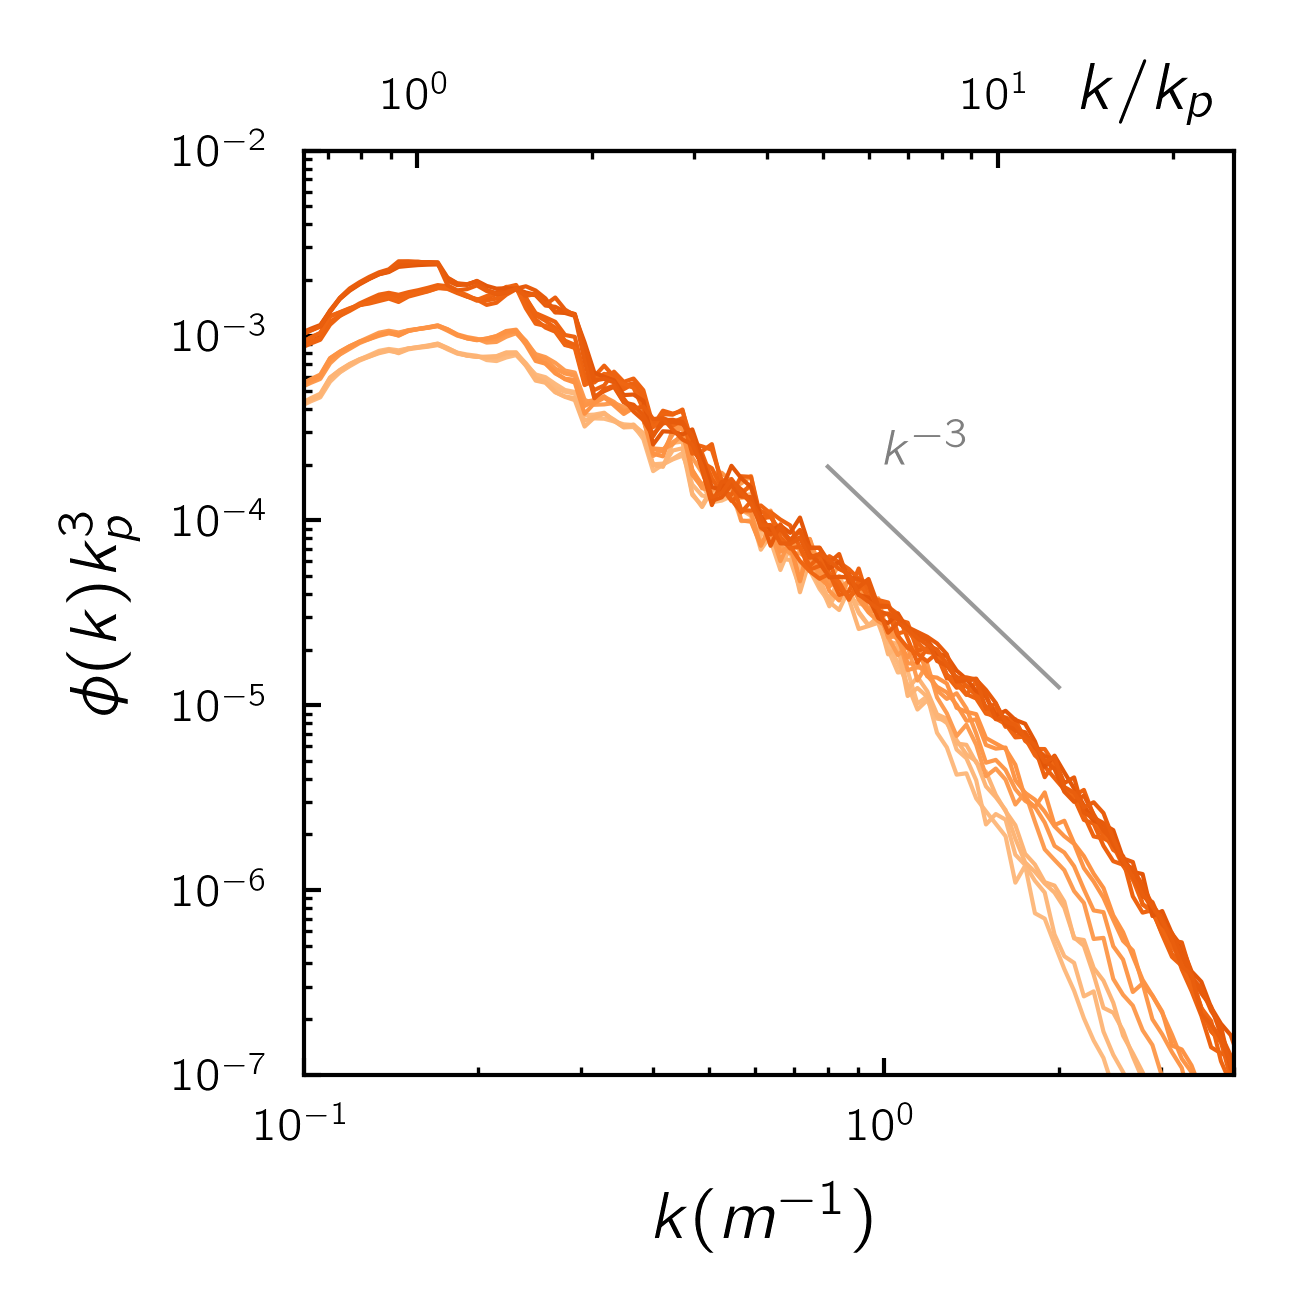

In [30]:
''' We need to smooth out the Ek and Ep curves otherwise the oscillation is going to impede dEk/dt and dEp/dt calculation 
    But we are only analyzing the value of dE/dt, so I removed the filter. 
'''
fig = plt.figure (figsize=[2,2]); ax = plt.gca()

for k, config in enumerate(config_set):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1) and (case.Npower == 5):
            filename = '../../multilayer/JFM2023/compilation/' + 'dissipation_' + case.label + '.nc'
            case.diss = xr.open_dataset(filename, engine='h5netcdf')
            print(filename)
            
            for i,t in enumerate(case.diss.tbin):
                cc = mpl.colormaps['Oranges']((case.diss.sigma.values[i]-0.05)/(0.2-0.05))
                ax.plot(case.diss.kbins, case.diss.F[i]*case.diss.kp**3, c=cc, lw=0.5)
            # ax.plot(moving_averages.t*(case.diss.kp*9.8)**0.5, 2*moving_averages.gpe/(case.energy.ke[0]+case.energy.gpe[0]), '-', c=cc)
            # # ax.plot(moving_averages.t*(case.diss.kp*9.8)**0.5, (moving_averages.ke+moving_averages.gpe)/(case.energy.ke[0]+case.energy.gpe[0]), '-', c=cc)
            # ax.plot(case.energy.t*(case.diss.kp*9.8)**0.5, (case.energy.ke+case.energy.gpe)/(case.energy.ke[0]+case.energy.gpe[0]), 
            #         alpha=0.5, lw=2, c=cc)
            
ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlim([0.1,4])
ax.set_ylim([10**(-7),10**(-2)])
ax.set_xlabel('$k (m^{-1})$'); ax.set_ylabel('$\phi(k)k_p^3$')

def timeskp(x):
    global case
    return x * (case.diss.kp)
def dividekp(x):
    global case
    return x / (case.diss.kp)
secax = ax.secondary_xaxis('top', functions=(dividekp, timeskp))
ax.annotate('$k/k_p$', xy=(1,1), xytext=(-2, 3), ha='right', va='bottom',
             xycoords='axes fraction', textcoords='offset points')
tick_pos =[1,10]
labels = ['$10^{0}$', '$10^{1}$']
secax.set_xticks(tick_pos, labels)

xplot = np.linspace(0.8,2,20)
print(xplot)
ax.plot(xplot, xplot**(-3)*0.0001, c='gray', alpha=0.8)
ax.annotate('$k^{-3}$',(1,2*10**(-4)), fontsize=6, c='gray')
plt.savefig('../figures/multilayer-diss/fig1b.pdf', bbox_inches='tight')

../../multilayer/JFM2023/compilation/dissipation_C1.nc
../../multilayer/JFM2023/field_new_200m_P0.008_RE40000_10_15_rand2_Htheta0.503/
[0.09974846 0.10076415 0.10237286 0.10310421]
[6.88131313e-05 5.10101010e-05 6.33838384e-05 1.05176768e-04]
[6.88131313e-05 5.10101010e-05 6.33838384e-05 1.05176768e-04]
../../multilayer/JFM2023/compilation/dissipation_C2.nc
../../multilayer/JFM2023/field_new_200m_P0.01_RE40000_10_15_rand2_Htheta0.503/
[0.1162927  0.11891929 0.12071859 0.1217051 ]
[0.00015997 0.00014949 0.00018636 0.00013801]
[0.00015997 0.00014949 0.00018636 0.00013801]
../../multilayer/JFM2023/compilation/dissipation_C3.nc
../../multilayer/JFM2023/field_new_200m_P0.016_RE40000_10_15_rand2_Htheta0.503/
[0.14704776 0.14652936 0.14692152 0.14549327]
[0.00063864 0.00078813 0.00037424 0.00031553]
[0.00063864 0.00078813 0.00037424 0.00031553]
../../multilayer/JFM2023/compilation/dissipation_C4.nc
../../multilayer/JFM2023/field_new_200m_P0.02_RE40000_10_15_rand4_Htheta0.503/
[0.15442404 0.15

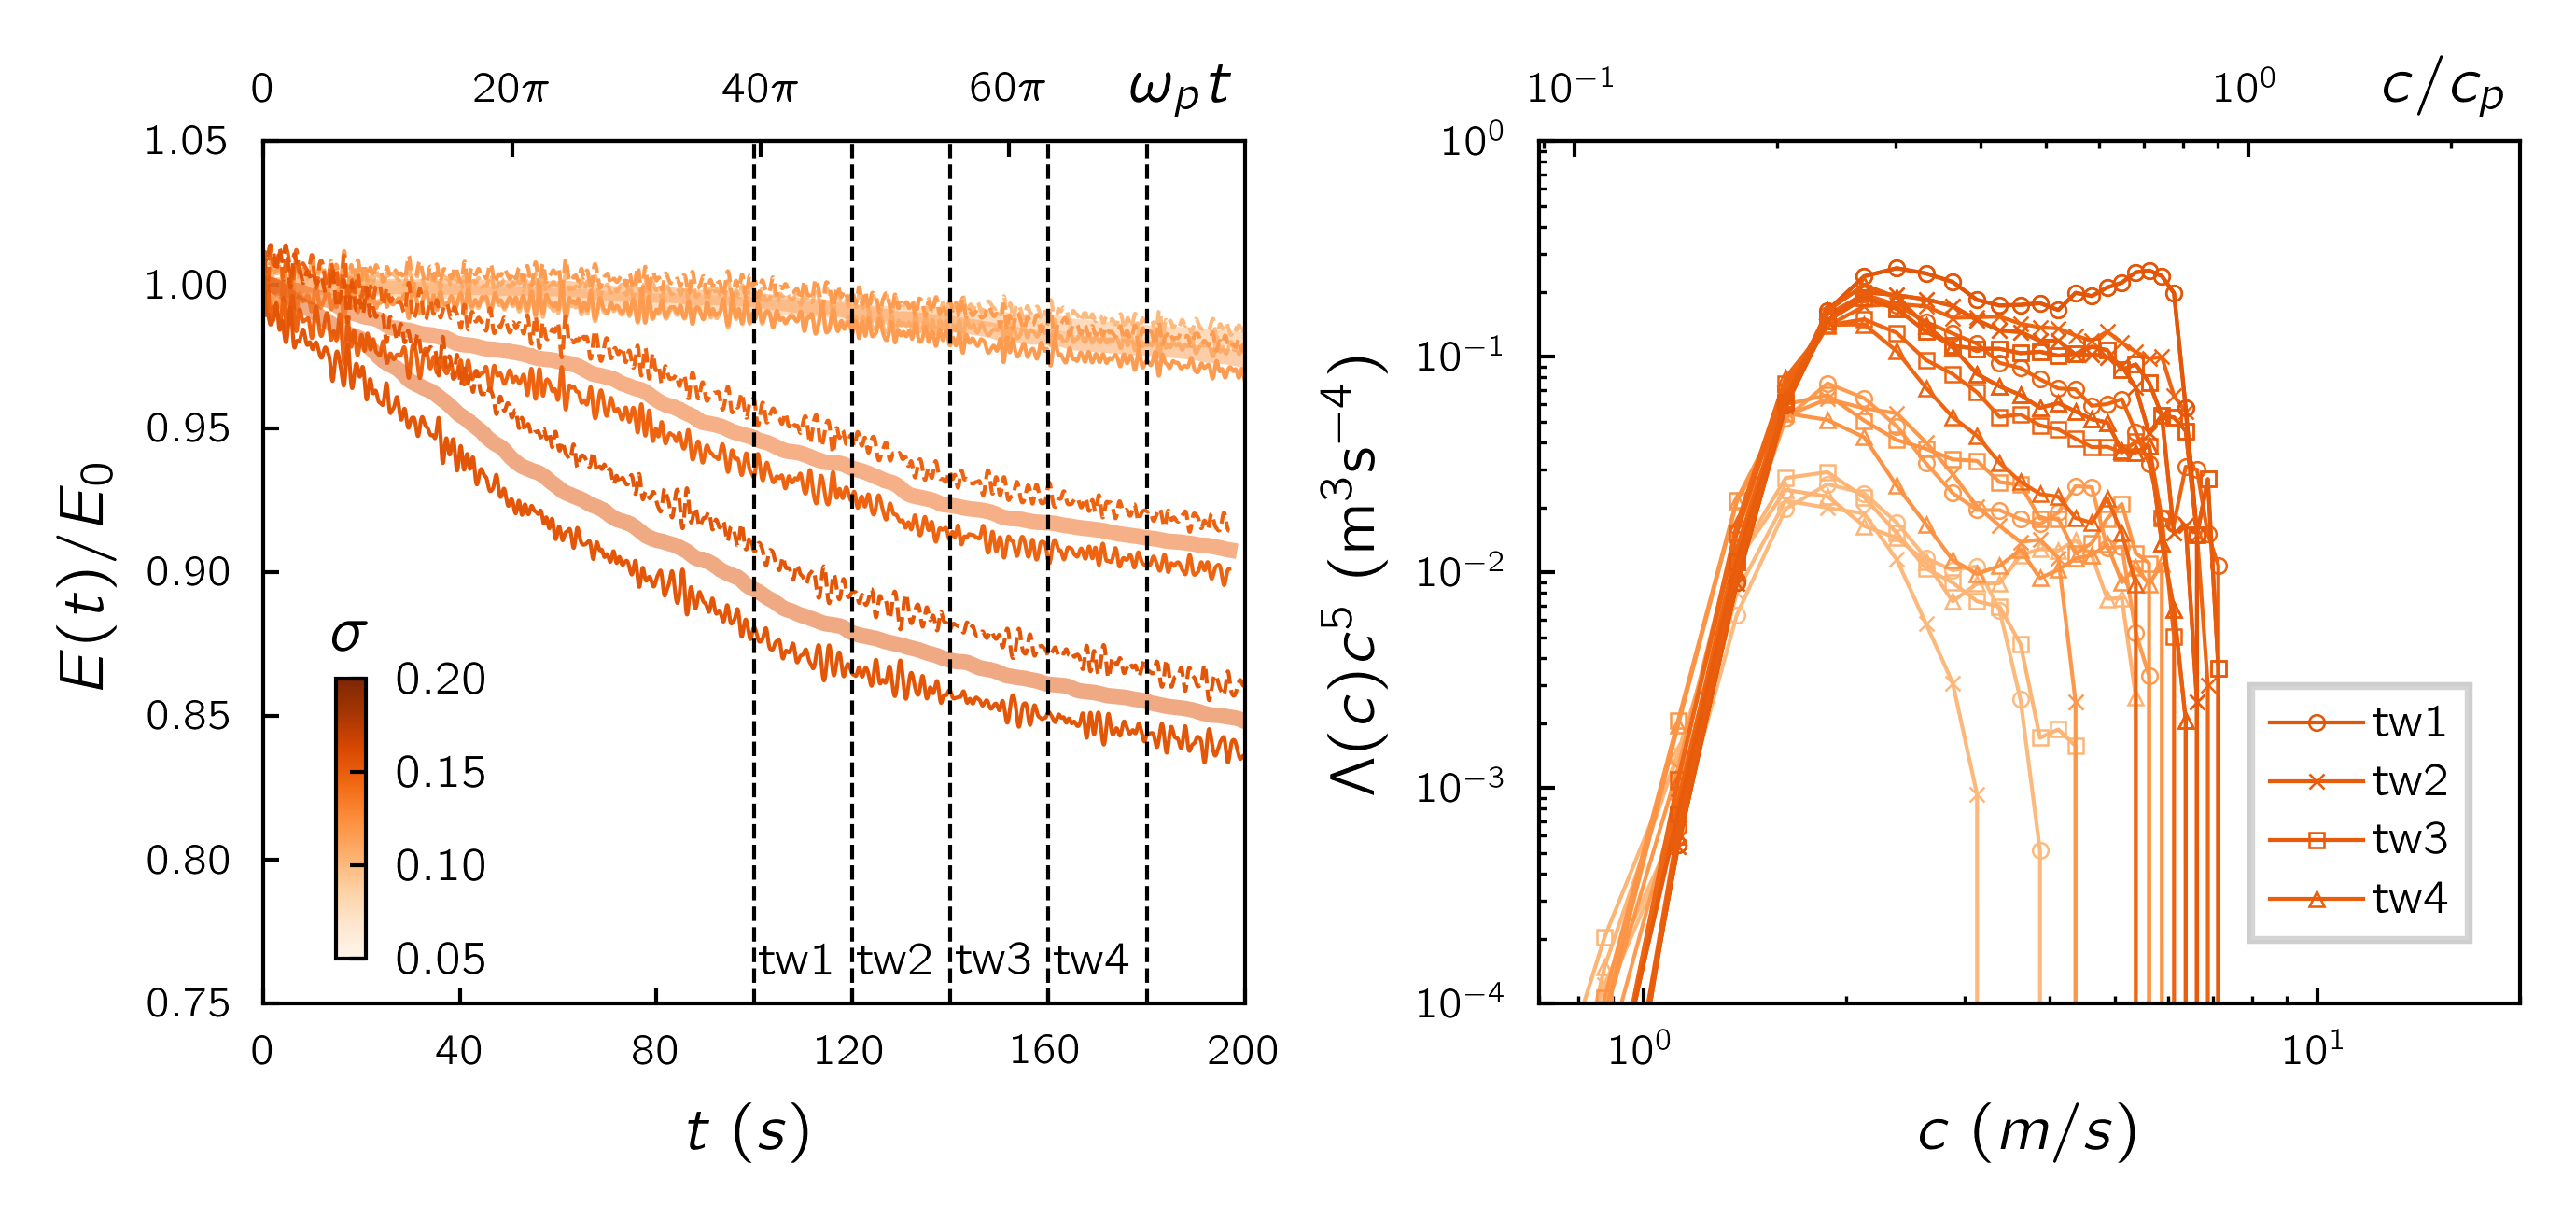

In [31]:
''' We need to smooth out the Ek and Ep curves otherwise the oscillation is going to impede dEk/dt and dEp/dt calculation 
    But we are only analyzing the value of dE/dt, so I removed the filter. 
'''
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
from matplotlib.ticker import FuncFormatter, MultipleLocator
fig, axes = plt.subplots (1, 2, figsize=[5.2,2])

ax = axes[0]
for k, config in enumerate(config_set[:5]):
    for case in config.cases:
        if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1) and (case.Npower == 5):
            filename = '../../multilayer/JFM2023/compilation/' + 'dissipation_' + case.label + '.nc'
            case.diss = xr.open_dataset(filename, engine='h5netcdf')
            print(filename)
            print(case.path)
            print(case.diss.sigma.values)
            print(case.diss.dEdt.values)
            
            filename = '../../multilayer/JFM2023/compilation/' + 'energy_' + case.label + '.txt'
            case.energy = pd.read_csv(filename, delimiter=' ', names=['t','ke','gpe'])
            window_size = 1
            windows = case.energy.rolling(window_size)
            moving_averages = windows.mean()
            
            cc = mpl.colormaps['Oranges']((case.diss.sigma.values[0]-0.05)/(0.2-0.05))
            case.omegap = (case.diss.kp*9.8)**0.5
            ax.plot(moving_averages.t, 2*moving_averages.ke/(case.energy.ke[0]+case.energy.gpe[0]), '--', c=cc)
            ax.plot(moving_averages.t, 2*moving_averages.gpe/(case.energy.ke[0]+case.energy.gpe[0]), '-', c=cc)
            # ax.plot(moving_averages.t*(case.diss.kp*9.8)**0.5, (moving_averages.ke+moving_averages.gpe)/(case.energy.ke[0]+case.energy.gpe[0]), '-', c=cc)
            ax.plot(case.energy.t, (case.energy.ke+case.energy.gpe)/(case.energy.ke[0]+case.energy.gpe[0]), 
                    alpha=0.5, lw=2, c=cc)
            
            case.dEkdt = []; case.dEpdt = []            
            for tseries in tseries_ensem:
                # print('From t = %g to %g.' %(tseries[0], tseries[-1]))
                idx1 = (np.abs(moving_averages.t - tseries[0])).argmin()
                idx2 = (np.abs(moving_averages.t - tseries[-1])).argmin()
                dEkdt = (moving_averages.ke[idx1] - moving_averages.ke[idx2])/(tseries[-1]-tseries[0])
                dEpdt = (moving_averages.gpe[idx1] - moving_averages.gpe[idx2])/(tseries[-1]-tseries[0])           
                case.dEkdt.append(dEkdt); case.dEpdt.append(dEpdt)
            case.dEkdt = np.array(case.dEkdt); case.dEpdt = np.array(case.dEpdt)
            case.dEdt = (case.dEkdt + case.dEpdt)/case.diss.L0**2
            print((case.dEkdt+case.dEpdt)/200**2)
            
for xloc in (100,120,140,160,180):            
    ax.axvline(x=xloc, color = 'k', linestyle = '--')
ax.set_xlabel(r'$t \;(s)$'); ax.set_xlim([0,200])
ax.set_ylabel(r'$E(t)/E_0$'); ax.set_ylim([0.75,1.05])
ax.set_xticks([0,40,80,120,160,200])
ax.annotate('tw1',(101,0.76), fontsize=6)
ax.annotate('tw2',(121,0.76), fontsize=6)
ax.annotate('tw3',(141,0.76), fontsize=6)
ax.annotate('tw4',(161,0.76), fontsize=6)

# Add normalized axis
def timesomega(x):
    global case
    return x * case.omegap
def divideomega(x):
    global case
    return x /case.omegap
secax = ax.secondary_xaxis('top', functions=(timesomega, divideomega))
# secax.set_xlabel('$\omega_p t$')
# ticklabelpad = mpl.rcParams['xtick.major.pad']
ax.annotate('$\omega_p t$', xy=(1,1), xytext=(-2, 3), ha='right', va='bottom',
             xycoords='axes fraction', textcoords='offset points')
tick_pos =[ 0,20*np.pi,40*np.pi,60*np.pi,80*np.pi]
labels = ['0','$20\pi$','$40\pi$','$60\pi$','$80\pi$']
secax.set_xticks(tick_pos, labels)

ax2  = fig.add_axes([0.15,0.15,0.01,0.25])
norm = mpl.colors.Normalize(vmin=0.05, vmax=0.2)
cbar = mpl.colorbar.ColorbarBase(ax2, cmap=plt.get_cmap('Oranges'), norm=norm, orientation='vertical', ticks=(0.05,0.1,0.15,0.2))
cbar.ax.tick_params(labelsize=6)
cbar.ax.text(0.5, 1.15, r'$\sigma$', ha='center', va='center', transform=cbar.ax.transAxes)

""" Energy dissipation distribution from Lambda(c). """
ax = axes[1]
lines = ['-o','-x','-s','-^']

for k, config in enumerate(config_set[:5]):
    print('P=%g' %config.P)
    for j,case in enumerate(config.cases):
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1):
#             case.diss.cc = 'k'
            # bins = case.hist_ensem['bins']
            # bins_plotting = case.diss.cbins
            bins_plotting = case.diss.cbins[1:] - (case.diss.cbins[2] - case.diss.cbins[1])/2
            case.zeroth_ensem = []
            case.first_ensem = []
            case.fifth_ensem = []
            for i in range(len(case.diss.Lambda)):
                case.cp = (9.8/config.kp)**0.5
                lambdac = case.diss.Lambda[i]/2**case.LEVEL/case.config.L0/(case.diss.cbins[2] - case.diss.cbins[1])
                cc = mpl.colormaps['Oranges']((case.diss.sigma.values[i]-0.05)/(0.2-0.05))
                ax.plot(bins_plotting, lambdac*bins_plotting**5, lines[i], 
                        c=cc, alpha=1, lw=0.5)            # The extra filter 
                case.zeroth_ensem.append(np.sum(case.diss.Lambda[i]/2**case.LEVEL/case.config.L0))
                case.first_ensem.append(np.sum(case.diss.Lambda[i]/2**case.LEVEL/case.config.L0*bins_plotting))
                case.fifth_ensem.append(np.sum(case.diss.Lambda[i]/2**case.LEVEL/case.config.L0*bins_plotting**5))

''' For legends '''
lls = []
case = config_set[3].cases[0]
bins = case.diss.cbins
bins_plotting = bins[1:] - (bins[2] - bins[1])/2
case.cp = (9.8/config.kp)**0.5
for i in range(len(case.diss.Lambda)):
    lambdac = case.diss.Lambda[i]/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])
    cc = mpl.colormaps['Oranges']((case.diss.sigma.values[i]-0.05)/(0.2-0.05))
    ll, = ax.plot(bins_plotting, lambdac*bins_plotting**5, lines[i],
                    c=cc, alpha=1, lw=0.5)            # The extra filter 
    lls.append(ll)
    
ax.set_xscale('log'); ax.set_yscale('log')
ax.set_ylim([10**(-4),10**(0)])
ax.set_xlim([0.7,20])
ax.set_xlabel(r'$c\;(m/s)$')
ax.set_ylabel(r'$\Lambda(c)c^5 \;\mathrm{(m^{3}s^{-4})}$')
legend1 = ax.legend([lls[0],lls[1],lls[2],lls[3]], ['tw1', 'tw2', 'tw3', 'tw4'], fontsize=6, 
                    handler_map={tuple: HandlerTuple(ndivide=None)}, handlelength=2, bbox_to_anchor=(0.697, 0.4))
ax.add_artist(legend1)

def timescp(x):
    global case
    return x * case.cp
def dividecp(x):
    global case
    return x /case.cp
secax = ax.secondary_xaxis('top', functions=(dividecp, timescp))
ax.annotate('$c/c_p$', xy=(1,1), xytext=(-2, 3), ha='right', va='bottom',
             xycoords='axes fraction', textcoords='offset points')
tick_pos =[0.1,1]
labels = ['$10^{-1}$','$10^{0}$']
secax.set_xticks(tick_pos, labels)

plt.subplots_adjust(wspace=0.3)
# plt.savefig('../figures/multilayer-diss/fig1cd.pdf', bbox_inches='tight')
plt.show()

### Figure 5

Linear fit through (0,0) slope is 0.0120985
[6.88131313e-05 5.10101010e-05 6.33838384e-05 1.05176768e-04]
[0.00015997 0.00014949 0.00018636 0.00013801]
[0.00063864 0.00078813 0.00037424 0.00031553]
[0.00113068 0.00071338 0.00062588 0.00045177]


/var/folders/3x/6pxbtcd51_3f99c16lp56vbr0000gn/T/ipykernel_14231/2953320146.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Linear fit through (0,0) slope is %g' %popt)
/var/folders/3x/6pxbtcd51_3f99c16lp56vbr0000gn/T/ipykernel_14231/2953320146.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.text(0.5,0.9,'$b_\mathrm{fit}=%.5f$' %popt, transform=ax.transAxes, fontsize=6)


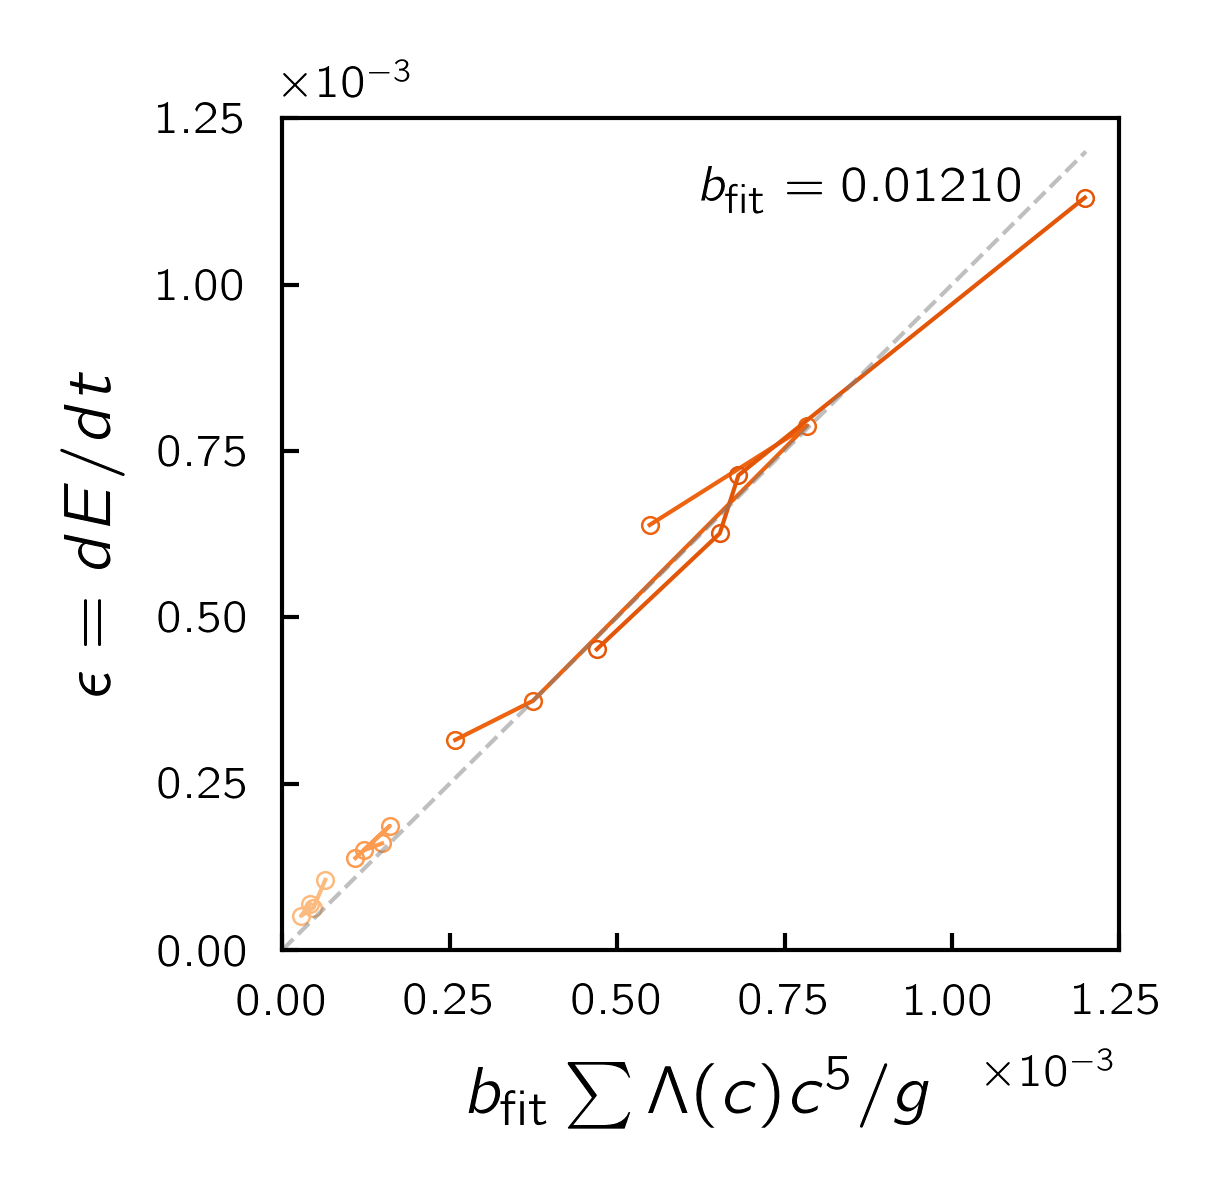

In [72]:
fig = plt.figure(figsize=[1.8,1.8]); ax = plt.gca()

# Fit a line that intercepts (0,0)
x = [config.cases[0].fifth_ensem for config in config_set[:5]]
y = [config.cases[0].diss.dEdt for config in config_set[:5]]
x = np.array(x).flatten()/9.8
y = np.array(y).flatten()

from scipy.optimize import curve_fit
def func(x, a):
    return a * x

popt, pcov = curve_fit(func, x, y)
print('Linear fit through (0,0) slope is %g' %popt)

for k, config in enumerate(config_set[:]):
    for case in config.cases:
        print(case.diss.dEdt.values)
        if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1) and (case.Npower == 5):
#             plt.plot(case.sigma, case.dEkdt, '-o', c=case.cc)
#             plt.plot(case.sigma, case.dEpdt, '-x', c=case.cc)
            cc = mpl.colormaps['Oranges']((case.diss.sigma.values[0]-0.05)/(0.2-0.05))
            plt.plot(np.array(case.fifth_ensem)*popt/9.8, case.diss.dEdt, '-o', c=cc)
#             case.bconstant = case.dEdt/case.config.L0**2/(case.fifth_ensem)*9.8

ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
# ax.set_xlim([0,0.0012]); ax.set_ylim([0,0.0012])
ax.set_xlabel('$b_\mathrm{fit}\sum \Lambda(c)c^5/g$'); ax.set_ylabel('$\epsilon=dE/dt$')
ax.text(0.5,0.9,'$b_\mathrm{fit}=%.5f$' %popt, transform=ax.transAxes, fontsize=6)
ax.plot(np.linspace(0,1.2*10**(-3),100), np.linspace(0,1.2*10**(-3),100), '--', c='gray', alpha=0.5)
ax.set_xlim([0,1.25*10**(-3)]); ax.set_ylim([0,1.25*10**(-3)])
ax.set_yticks([0,0.25*10**(-3),0.5*10**(-3),0.75*10**(-3),1*10**(-3),1.25*10**(-3)])

### Energy against fifth moment

/var/folders/3x/6pxbtcd51_3f99c16lp56vbr0000gn/T/ipykernel_23144/3013109602.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Linear fit through (0,0) slope is %g' %popt)
/var/folders/3x/6pxbtcd51_3f99c16lp56vbr0000gn/T/ipykernel_23144/3013109602.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.text(0.5,0.9,'$b_\mathrm{fit}=%.4f$' %popt, transform=ax.transAxes, fontsize=6)


Linear fit through (0,0) slope is 0.0120985
[6.88131313e-05 5.10101010e-05 6.33838384e-05 1.05176768e-04]
[0.00015997 0.00014949 0.00018636 0.00013801]
[0.00063864 0.00078813 0.00037424 0.00031553]
[0.00113068 0.00071338 0.00062588 0.00045177]


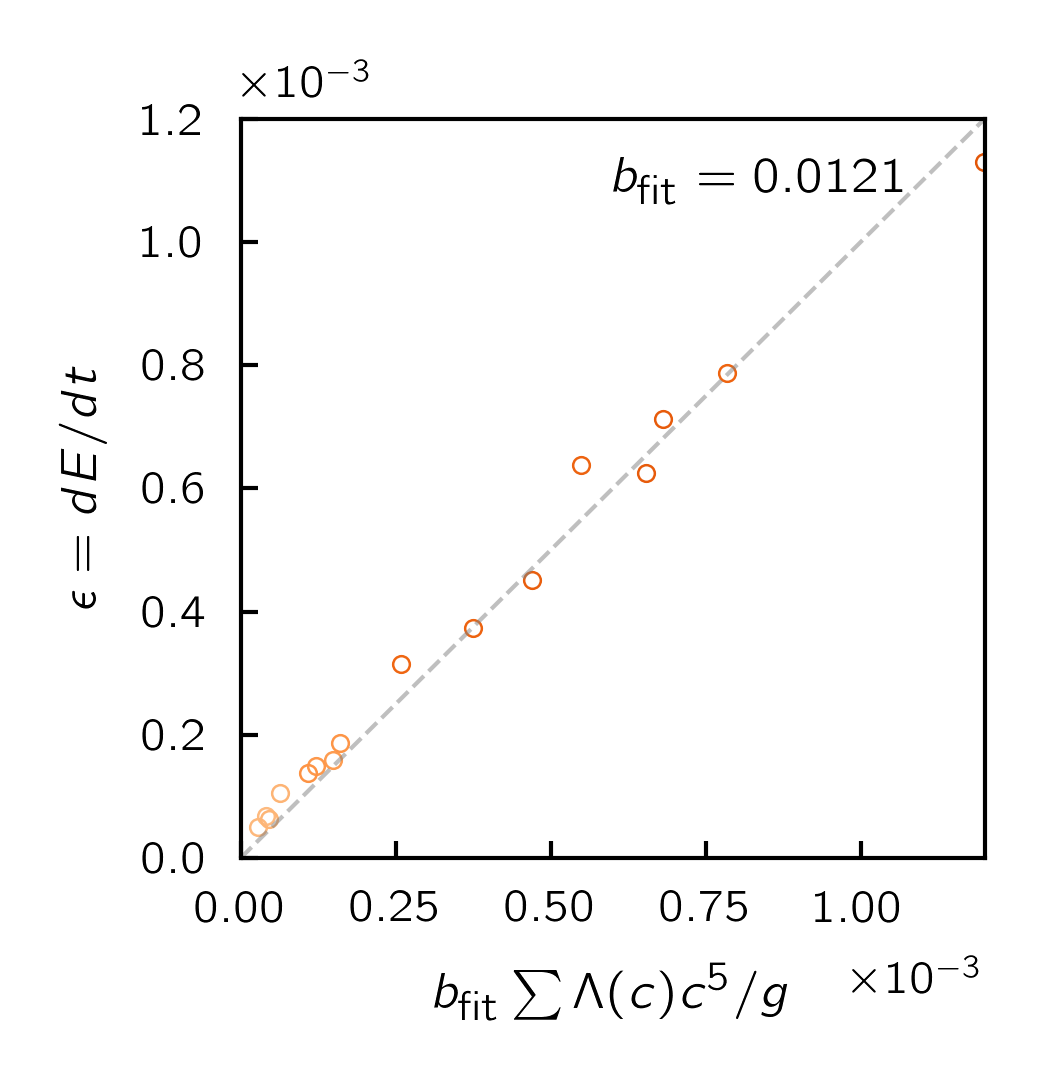

In [47]:
fig = plt.figure(figsize=[1.6,1.6]); ax = plt.gca()

x = [config.cases[0].fifth_ensem for config in config_set[:5]]
y = [config.cases[0].diss.dEdt for config in config_set[:5]]
x = np.array(x).flatten()/9.8
y = np.array(y).flatten()

from scipy.optimize import curve_fit
def func(x, a):
    return a * x

popt, pcov = curve_fit(func, x, y)
print('Linear fit through (0,0) slope is %g' %popt)

for k, config in enumerate(config_set[:4]):
    for case in config.cases:
        print(case.diss.dEdt.values)
        if (case.NL == 15) and (case.LEVEL == 10) and (case.rand != 0) and (case.rand != 1) and (case.Npower == 5):
#             plt.plot(case.sigma, case.dEkdt, '-o', c=case.cc)
#             plt.plot(case.sigma, case.dEpdt, '-x', c=case.cc)
            for i,t in enumerate(case.diss.tbin):
                cc = mpl.colormaps['Oranges']((case.diss.sigma.values[i]-0.05)/(0.2-0.05))
                plt.plot(case.fifth_ensem[i]*popt/9.8, case.diss.dEdt[i], 'o', c=cc)
#             case.bconstant = case.dEdt/case.config.L0**2/(case.fifth_ensem)*9.8
ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
ax.set_xlim([0,0.0012]); ax.set_ylim([0,0.0012])
ax.set_xlabel('$b_\mathrm{fit}\sum \Lambda(c)c^5/g$', fontsize=6)
ax.set_ylabel('$\epsilon=dE/dt$', fontsize=6)
ax.text(0.5,0.9,'$b_\mathrm{fit}=%.4f$' %popt, transform=ax.transAxes, fontsize=6)
ax.plot(np.linspace(0,1.2*10**(-3),100), np.linspace(0,1.2*10**(-3),100), '--', c='gray', alpha=0.5)
plt.savefig('../figures/multilayer-diss/fig5a.pdf', bbox_inches='tight')

### Energy against Phi

/var/folders/3x/6pxbtcd51_3f99c16lp56vbr0000gn/T/ipykernel_23144/1608198185.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Linear fit through (0,0) slope is %g' %popt)
/var/folders/3x/6pxbtcd51_3f99c16lp56vbr0000gn/T/ipykernel_23144/1608198185.py:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.text(0.5,0.9,r'$\nu_\mathrm{fit}=%.4f$' %nufit, transform=ax.transAxes, fontsize=6)


Linear fit through (0,0) slope is 0.012136


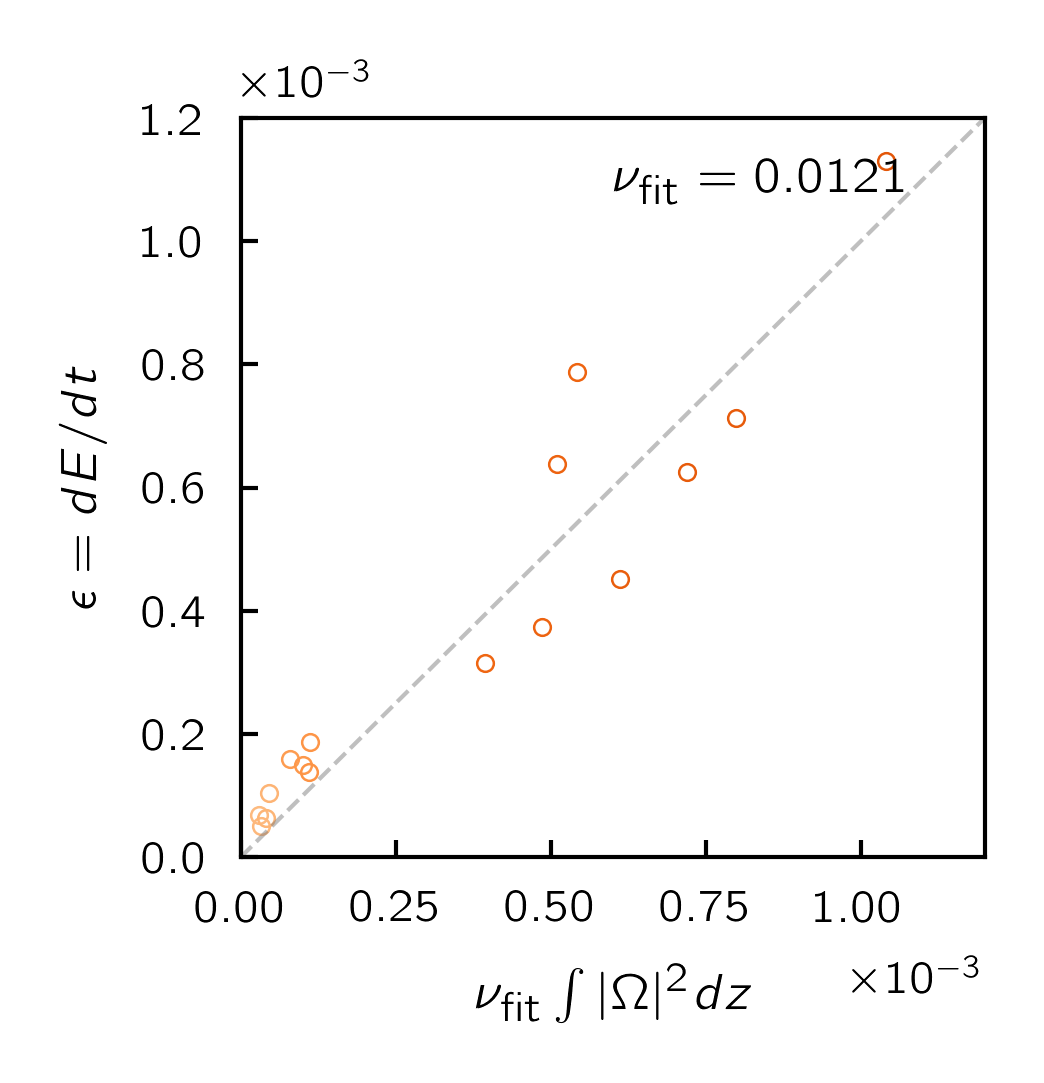

In [45]:
''' Energy against Phi, Phi is computed by fig3.ipynb and stored in datalocal '''
    
fig = plt.figure(figsize=[1.6,1.6]); ax = plt.gca()
import pickle 
filehandler = open("./datalocal/Phi_dict_ensem.pkl",'rb')
Phi_dict_ensem = pickle.load(filehandler)
filehandler.close()

# TODO: still need to fit the data

xfit = []; yfit = []

for Phi_dict in Phi_dict_ensem:
    for config in config_set[0:5]:
        for case in config.cases:
            if case.label == Phi_dict['case']:
                if Phi_dict['t'] == 110 or Phi_dict['t'] == 130 or Phi_dict['t'] == 150 or Phi_dict['t'] == 170:
                    # Need to rewrite the time selection later
                    dEdt_lookup = case.diss.dEdt.sel(tbin=Phi_dict['t'])
                    xfit.append(Phi_dict['Phi'])
                    yfit.append(dEdt_lookup)
                    
from scipy.optimize import curve_fit
def func(x, a):
    return a * x
popt, pcov = curve_fit(func, np.array(xfit), np.array(yfit))
print('Linear fit through (0,0) slope is %g' %popt)
nufit = popt

for Phi_dict in Phi_dict_ensem:
    for config in config_set[:4]:
        for case in config.cases:
            if case.label == Phi_dict['case']:
                if Phi_dict['t'] == 110 or Phi_dict['t'] == 130 or Phi_dict['t'] == 150 or Phi_dict['t'] == 170:
                    # Need to rewrite the time selection later
                    dEdt_lookup = case.diss.dEdt.sel(tbin=Phi_dict['t'])
                    cc = mpl.colormaps['Oranges']((case.diss.sigma.sel(tbin=Phi_dict['t'])-0.05)/(0.2-0.05))
                    plt.plot(nufit*Phi_dict['Phi'], dEdt_lookup, 'o', c=cc)               

ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
ax.set_xlim([0,0.0012]); ax.set_ylim([0,0.0012])
ax.set_xlabel(r'$\nu_\mathrm{fit}\int |\mathbf{\Omega}|^2 dz$', fontsize=6)
ax.set_ylabel('$\epsilon=dE/dt$',fontsize=6)
ax.text(0.5,0.9,r'$\nu_\mathrm{fit}=%.4f$' %nufit, transform=ax.transAxes, fontsize=6)
ax.plot(np.linspace(0,1.2*10**(-3),100), np.linspace(0,1.2*10**(-3),100), '--', c='gray', alpha=0.5)
plt.savefig('../figures/multilayer-diss/fig5b.pdf', bbox_inches='tight')